# le pouvoir d'achat des ouvriers anglais du XVIe au XIXe siècle

On utilise le [jeu de données de William Playfair](https://vincentarelbundock.github.io/Rdatasets/doc/HistData/Wheat.html) pour étudier l'évolution du pouvoir d'achat des ouvriers anglais du XVIe au XIXe siècle.


In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## Importation du jeu de données

On importe le jeu de données d'après l'url suivant :

In [2]:
data_url = "https://raw.githubusercontent.com/vincentarelbundock/Rdatasets/master/csv/HistData/Wheat.csv"
data = pd.read_csv(data_url)
data

Unnamed: 0  Year  Wheat  Wages
0            1  1565   41.0   5.00
1            2  1570   45.0   5.05
2            3  1575   42.0   5.08
3            4  1580   49.0   5.12
4            5  1585   41.5   5.15
5            6  1590   47.0   5.25
6            7  1595   64.0   5.54
7            8  1600   27.0   5.61
8            9  1605   33.0   5.69
9           10  1610   32.0   5.78
10          11  1615   33.0   5.94
11          12  1620   35.0   6.01
12          13  1625   33.0   6.12
13          14  1630   45.0   6.22
14          15  1635   33.0   6.30
15          16  1640   39.0   6.37
16          17  1645   53.0   6.45
17          18  1650   42.0   6.50
18          19  1655   40.5   6.60
19          20  1660   46.5   6.75
20          21  1665   32.0   6.80
21          22  1670   37.0   6.90
22          23  1675   43.0   7.00
23          24  1680   35.0   7.30
24          25  1685   27.0   7.60
25          26  1690   40.0   8.00
26          27  1695   50.0   8.50
27          28  1700   30.0   9.00
28          29  1705   32.0  10.00
29          30  1710   44.0  11.00
30          31  1715   33.0  11.75
31          32  1720   29.0  12.50
32          33  1725   39.0  13.00
33          34  1730   26.0  13.30
34          35  1735   32.0  13.60
35          36  1740   27.0  14.00
36          37  1745   27.5  14.50
37          38  1750   31.0  15.00
38          39  1755   35.5  15.70
39          40  1760   31.0  16.50
40          41  1765   43.0  17.60
41          42  1770   47.0  18.50
42          43  1775   44.0  19.50
43          44  1780   46.0  21.00
44          45  1785   42.0  23.00
45          46  1790   47.5  25.50
46          47  1795   76.0  27.50
47          48  1800   79.0  28.50
48          49  1805   81.0  29.50
49          50  1810   99.0  30.00
50          51  1815   78.0    NaN
51          52  1820   54.0    NaN
52          53  1821   54.0    NaN

## Premier graphique 

Pour ce premier graphique, l'objectif est de reproduire quelque chose de similaire au [graphique produit par William Playfair](https://upload.wikimedia.org/wikipedia/commons/3/3a/Chart_Showing_at_One_View_the_Price_of_the_Quarter_of_Wheat%2C_and_Wages_of_Labour_by_the_Week%2C_from_1565_to_1821.png). 
On commence par créer les deux premier graphiques bruts :

Evolution du prix du blé :

<BarContainer object of 53 artists>

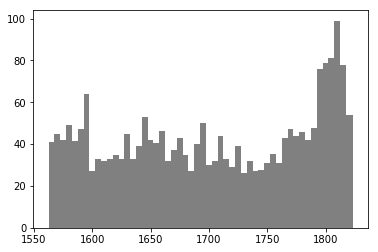

In [3]:
plt.bar(data['Year'],data['Wheat'], 5, color='grey')

Evolution du salaire hebdomadaire :

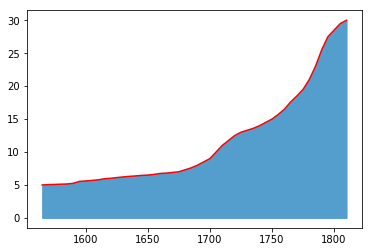

In [4]:
plt.plot(data['Year'],data['Wages'], color='r')
plt.fill_between(data['Year'], data['Wages'], color='#539ecd')

On peut maintenant superposer les deux graphiques, en ajoutant un échelle à droite et les légendes.

Text(0,0.5,'The price of the quarter of wheat in shillings')

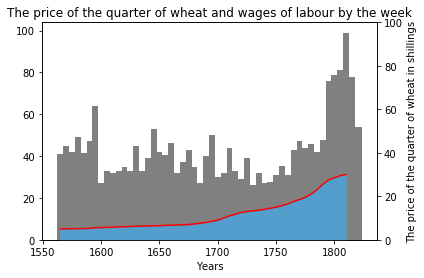

In [5]:
fig1, ax1 = plt.subplots()
ax1.set_title("The price of the quarter of wheat and wages of labour by the week")
ax1.bar(data['Year'], data['Wheat'],5, color='grey')
ax1.set_xlabel("Years")

ax2 = ax1.twinx()
ax2.set_ylim((0,100))
ax2.plot(data['Year'],data['Wages'], color='r')
ax2.fill_between(data['Year'], data['Wages'], color='#539ecd')
ax2.set_ylabel("The price of the quarter of wheat in shillings")


## Amélioration de la présentation des données
On ajuste les unités du graphique, on remplace shillings par shillings par quart de boisseau de bé ou shillings par semaine.

Text(0,0.5,'Weekly wages (in shillings by week)')

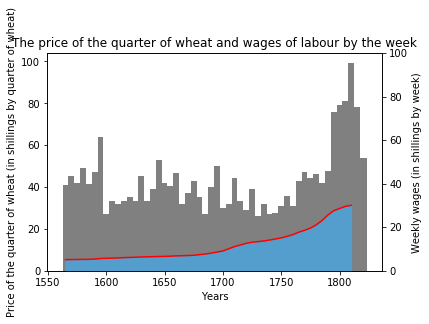

In [6]:
fig1, ax1 = plt.subplots()
ax1.bar(data['Year'], data['Wheat'],5, color='grey')
ax1.set_title("The price of the quarter of wheat and wages of labour by the week")
ax1.set_xlabel("Years")
ax1.set_ylabel("Price of the quarter of wheat (in shillings by quarter of wheat)")

ax2 = ax1.twinx()
ax2.set_ylim((0,100))
ax2.plot(data['Year'],data['Wages'], color='r')
ax2.fill_between(data['Year'], data['Wages'], color='#539ecd')
ax2.set_ylabel("Weekly wages (in shillings by week)")

## Ajustement des données pour observer l'évolution du pouvoir d'achat

On souhaite représenter le pouvoir d'achat au cours du temps, défini comme la quantité de blé qu'un ouvrier peut acheter avec son salaire hebdomadaire. 
On crée une nouvelle colonne au tableau : la colonne Power qui représente le pouvoir d'achat de l'année, la quantité de quart de boisseaux de blé qu'un ouvrier peut acheter par semaine.

In [7]:
data['Power'] = data['Wages']/data['Wheat']
data

Unnamed: 0  Year  Wheat  Wages     Power
0            1  1565   41.0   5.00  0.121951
1            2  1570   45.0   5.05  0.112222
2            3  1575   42.0   5.08  0.120952
3            4  1580   49.0   5.12  0.104490
4            5  1585   41.5   5.15  0.124096
5            6  1590   47.0   5.25  0.111702
6            7  1595   64.0   5.54  0.086563
7            8  1600   27.0   5.61  0.207778
8            9  1605   33.0   5.69  0.172424
9           10  1610   32.0   5.78  0.180625
10          11  1615   33.0   5.94  0.180000
11          12  1620   35.0   6.01  0.171714
12          13  1625   33.0   6.12  0.185455
13          14  1630   45.0   6.22  0.138222
14          15  1635   33.0   6.30  0.190909
15          16  1640   39.0   6.37  0.163333
16          17  1645   53.0   6.45  0.121698
17          18  1650   42.0   6.50  0.154762
18          19  1655   40.5   6.60  0.162963
19          20  1660   46.5   6.75  0.145161
20          21  1665   32.0   6.80  0.212500
21          22  1670   37.0   6.90  0.186486
22          23  1675   43.0   7.00  0.162791
23          24  1680   35.0   7.30  0.208571
24          25  1685   27.0   7.60  0.281481
25          26  1690   40.0   8.00  0.200000
26          27  1695   50.0   8.50  0.170000
27          28  1700   30.0   9.00  0.300000
28          29  1705   32.0  10.00  0.312500
29          30  1710   44.0  11.00  0.250000
30          31  1715   33.0  11.75  0.356061
31          32  1720   29.0  12.50  0.431034
32          33  1725   39.0  13.00  0.333333
33          34  1730   26.0  13.30  0.511538
34          35  1735   32.0  13.60  0.425000
35          36  1740   27.0  14.00  0.518519
36          37  1745   27.5  14.50  0.527273
37          38  1750   31.0  15.00  0.483871
38          39  1755   35.5  15.70  0.442254
39          40  1760   31.0  16.50  0.532258
40          41  1765   43.0  17.60  0.409302
41          42  1770   47.0  18.50  0.393617
42          43  1775   44.0  19.50  0.443182
43          44  1780   46.0  21.00  0.456522
44          45  1785   42.0  23.00  0.547619
45          46  1790   47.5  25.50  0.536842
46          47  1795   76.0  27.50  0.361842
47          48  1800   79.0  28.50  0.360759
48          49  1805   81.0  29.50  0.364198
49          50  1810   99.0  30.00  0.303030
50          51  1815   78.0    NaN       NaN
51          52  1820   54.0    NaN       NaN
52          53  1821   54.0    NaN       NaN

On représente maintenant l'évolution de ce pouvoir d'achat dans le temps

Text(0,0.5,'Buying power')

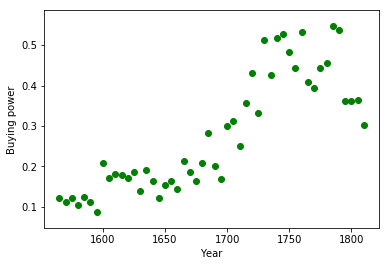

In [8]:
plt.scatter(data['Year'],data['Power'], color='green')
plt.xlabel('Year')
plt.ylabel('Buying power')

## Evolution du prix du blé en fonction du salaire

Dans un dernier graphique, on veut montrer l'évolution du prix du blé en fonction du salaire, sans l'axe du temps. On indique la progression du temps avec la couleur : plus l'année est récente, plus la couleur du point est foncée.

Text(0,0.5,'Price of the quarter of wheat (in shillings by quarter of wheat)')

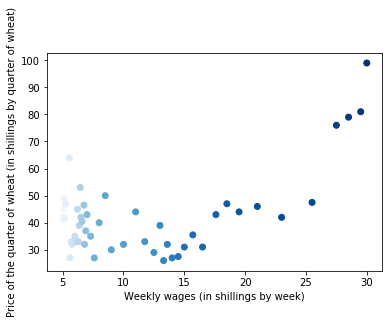

In [9]:
plt.scatter(data['Wages'],data['Wheat'], c=data['Year'], cmap = 'Blues')
plt.xlabel('Weekly wages (in shillings by week)')
plt.ylabel('Price of the quarter of wheat (in shillings by quarter of wheat)')


## Conclusion

Parmi tous ces graphiques, le plus adapté pour moi est le graphique qui représente directement l'évolution du pouvoir d'achat dans le temps. On voit bien l'augmentation progressive du pouvoir d'achat jusqu'aux années 1700, puis une augmentation brutale jusqu'en 1730 avant une stabilisation puis une diminution. 
C'est le comportement global, mais en regardant chaque année, on constate que l'évolution est "en dents de scies" : une année à fort pouvoir d'achat est souvent suivie d'une année à plus faible pouvoir d'achat, et inversement. Grace aux autres graphiques, on comprend que ce comportement est directement du à la fluctuation forte d'une année sur l'autre du prix du blé, car le salaire est lui en constante augmentation sur la période de temps étudiée.